# Introduction

The image below provides a summary of the metrics available in the Scikit-Learn library grouped by task (e.g., classification, regression and clustering).

<img src="https://drive.google.com/uc?id=184NgFeVKI2uLD5eyKessu4TmopKk-q9w">

# Classification metrics
Before diving in the main evaluation metrics lets understand the terms that form the basis for these.

- True Positive (TP - actual = 1, predicted = 1): Label which was predicted Positive and is actually Positive.
- True Negative (TN - actual = 0, predicted = 0): Label which was predicted Negative and is actually Negative.
- False Positive (FP - actual = 0, predicted = 1): Label which was predicted as Positive, but is actually Negative.
- False Negative (FN - actual = 1, predicted = 0): Label which was predicted as Negative, but is actually Positive.
    
<img src="https://drive.google.com/uc?id=181x7zkHwtDM3SU2hlz1b0o4ReiTO6Uga">
<img src="https://drive.google.com/uc?id=1Kgvbgm_qdAen2Icl2CldERaqCEiYR9nW">

## Accuracy score
The most common metric for classification is accuracy, which is the **fraction of samples predicted correctly**. In Sklearn the accuracy is computed by the function accuracy_score, which can produce either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

If $\hat{y_i}$ is the predicted value of the i-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over $n_{samples}$ is defined as

$$accuracy(y_i, \hat{y_i}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1} 1(y_i = \hat{y_i})$$

where $1(x)$ is the indicator function.

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
#print(accuracy_score(y_true, y_pred, normalize=False))

0.5


### Does accuracy matter?
Is accuracy an always effective evaluation measure? No! Accuracy is not always the best metric to use to assess classification models. For example, let’s say that we are trying to predict something that only happens 1 out of 100 times. We could build a model that gets 99% accuracy by saying the event never happened. However, we catch 0% of the events we care about. This aspect is particularly critical when your target class is not balanced (data is skewed).

## Precision
It is the ‘Exactness’, ability of the model to return only relevant instances. If your use case/problem statement involves minimizing the False Positives then Precision is something you need.

$$ Precision = \frac{TP}{TP+FP} $$

## Recall
It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity.

$$ Recall = \frac{TP}{TP+FN} $$

One method to boost the recall is to increase the number of samples that you define as predicted positive by lowering the threshold for predicted positive. Unfortunately, this will also increase the number of false positives.

## F1 score
What would you do if one model was better at recall and the other was better at precision? One method that some data scientists use is called the F1 score.
The f1 score is the harmonic mean of recall and precision, with a higher score as a better model. The f1 score is calculated using the following formula:

$$ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{2*precision*recall}{precision + recall} $$

F1 Score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = [0, 1, 1, 0]
y_true = [0, 1, 0, 1]
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

0.5
0.5
0.5


## Multiclass classification
In multiclass and multilabel classification task, the notions of precision, recall, and F-measures can be applied to each label independently. There are a few ways to combine results across labels, specified by the average argument to the average_precision_score (multilabel only), f1_score, fbeta_score, precision_recall_fscore_support, precision_score and recall_score functions, as described above. Note that if all labels are included, “micro”-averaging in a multiclass setting will produce precision, recall and $F$ that are all identical to accuracy. Also note that “weighted” averaging may produce an F-score that is not between precision and recall.

<img src="https://drive.google.com/uc?id=17jk9jEcha3DVebkNseD-yYJSWSyiQJ2M">

## Receiver operating characteristic (ROC) and AUC
A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

ROC curves are very help with understanding the **balance between true positive rate and false positive rates**. Sci-kit learn has built in functions for ROC curves and for analyzing them. The inputs to these functions (roc_curve and roc_auc_score) are the actual labels and the predicted probabilities (not the predicted labels).

The roc_curve function returns three lists:
- thresholds = all unique prediction probabilities in descending order
- TPR = the true positive rate (TP / (TP + FN)) for each threshold (sensitivity)
- FPR = the false positive rate (FP / (FP + TN)) for each threshold (1-specificity)

In [3]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[ inf 0.8  0.4  0.35 0.1 ]


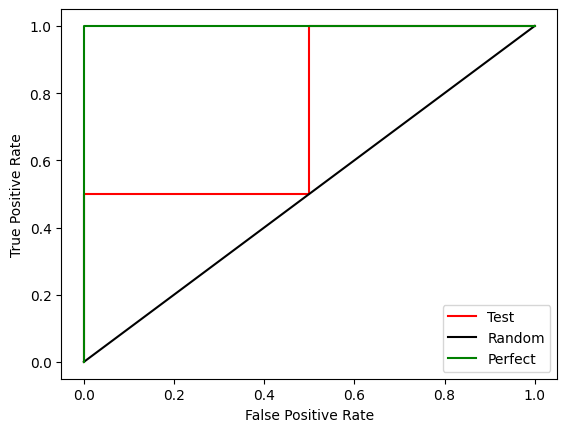

In [4]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,'r-',label = 'Test')
plt.plot([0,1],[0,1],'k-',label='Random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='Perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<img src="https://drive.google.com/uc?id=1jzzC_a54MqYxbyz37NpPJT3E_ElUamMX">

There are a couple things that we can observe from this figure:
- a model that randomly guesses the label will result in the red line and you want to have a model that has a curve above this red line
- an ROC that is farther away from the red line is better, so green/blue look better than red
- Although not seen directly, a high threshold results in a point in the bottom left and a low threshold results in a point in the top right. This means as you decrease the threshold you get higher TPR at the cost of a higher FPR

To analyze the performance, we will use the area-under-curve metric. The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.


In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

## Confusion matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

By definition, entry $i,j$ in a confusion matrix is the number of observations actually in group $i$, but predicted to be in group $j$. Here is an example:

In [6]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Sulla diagonale principale ho i veri positivi. Righe classi predette, colonne classi reali.


### Example
Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our choice for the regularization parameter C was not the best.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


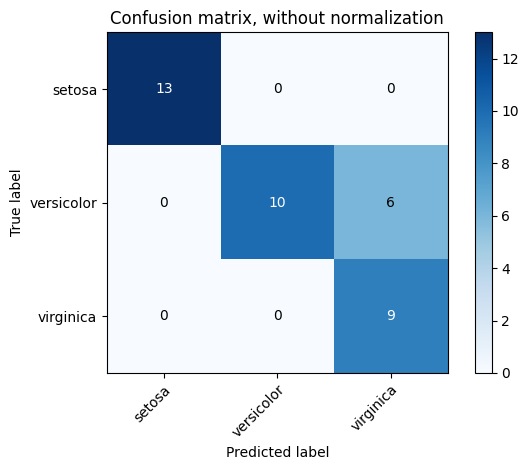

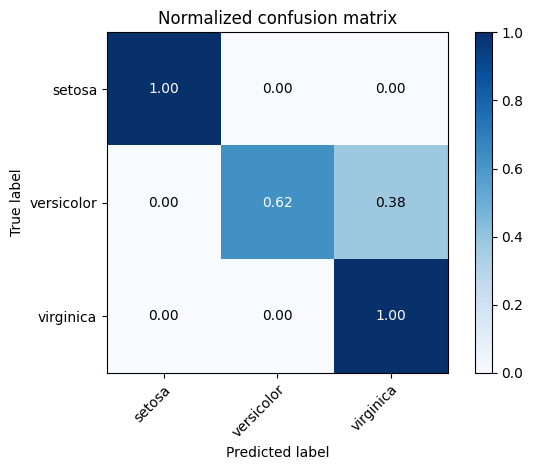

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

For binary problems, we can get counts of true negatives, false positives, false negatives and true positives as follows:

In [8]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(2), np.int64(1), np.int64(2), np.int64(3))

In [9]:
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [2, 3]])

## Classification report
The classification_report function builds a text report showing the main classification metrics. Here is a small example with custom target_names and inferred labels:

In [10]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



# Regression metrics
The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance.

## Explained variance score
The explained_variance_score computes the explained variance regression score.

If $\hat{y}$ is the estimated target output, $y$ the corresponding (correct) target output, and $Var$ is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$$ explained\_variance(\hat{y}, y) = 1 - \frac{Var\{y - \hat{y}\}}{Var\{y\}} $$

The best possible score is 1.0, lower values are worse.

In [11]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
y_pred = [12.5, 1005.0, 12, 18]
print(explained_variance_score(y_true, y_pred))

-25455.702355460384


## Max error
The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value, then the max error is defined as:

$$ MaxError(\hat{y}, y) = max(|y_i-\hat{y_i}|) $$



In [12]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 2]
max_error(y_true, y_pred)

6.0

## Mean Absolute Error
The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) estimated over $n_{samples}$ is defined as:

$$ MAE(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}} |y_{i}-\hat{y_{i}}| $$

**MAE is a linear score which means all the individual differences are weighted equally. In this perspective, it is robust to outliers and does not penalize the errors, and it is not suitable for applications where you want to pay more attention to the outliers.**

**Few positive values might bring the error up while few negatives bring the error down finally resulting in a statistic not indicative of model performance. So, we consider only the difference in magnitude of actual and predicted.**

In [13]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 12]
mean_absolute_error(y_true, y_pred)

1.5

## Mean Squared Error
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) estimated over $n_{samples}$ is defined as:

$$ MSE(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}} (y_{i}-\hat{y_{i}})^2 $$

In [14]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 12]
mean_squared_error(y_true, y_pred)

6.375

**As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. It is preferred more than other metrics because it is differentiable and hence can be optimized better.**

**Another way to interpret MSE is Variance of error values (how widely dispersed errors are)!**

## Root Mean Square Error
RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that **RMSE is useful when large errors are undesired**.

$$ RMSE(y, \hat{y}) = \sqrt{\frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}} (y_{i}-\hat{y_{i}})^2} $$

It represents the sample standard deviation of the differences between predicted values and observed values (called residuals).

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
sqrt(mean_squared_error(y_true, y_pred))

0.6123724356957945

## MAE vs RMSE
It is easy to understand and interpret MAE because it directly takes the average of offsets whereas RMSE penalizes the higher difference more than MAE.
Let’s understand the above statement with the two examples:

Case 1: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,10]

Case 2: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,12]

MAE for case 1 = 2.0, RMSE for case 1 = 2.0

MAE for case 2 = 2.5, RMSE for case 2 = 2.65

From the above example, we can see that RMSE penalizes the last value prediction more heavily than MAE. Generally, RMSE will be higher than or equal to MAE. The only case where it equals MAE is when all the differences are equal or zero (true for case 1 where the difference between actual and predicted is 2 for all observations).

The range of RMSE and MAE is from 0 to infinity.

## Mean Squared Logarithmic Error
The mean_squared_log_error function computes a risk metric corresponding to the expected value of the squared logarithmic (quadratic) error or loss.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value, then the mean squared logarithmic error (MSLE) estimated over $n_{samples}$ is defined as:

$$ MSLE(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}} (log_e(1+y_{i})-log_e(1+\hat{y_{i}}))^2 $$

Where $log_e(x)$ means the natural logarithm of $x$. This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc. Note that this metric penalizes an under-predicted estimate greater than an over-predicted estimate.

**When observations are huge in magnitude for both actual and predicted values, error for that pair is going to be large compared to other smaller magnitude observations. For instance, you might come across a real estate dataset where there is a good mix of expensive mansions, average houses and ultra-cheap falling apart houses like these. If a model predicts small condos worth 100,000 as 50,000 then it is off by a lot but if the same model predicts a mansion’s price as 900,000 instead of 850,000 we can consider it close. The same error value of $50k is both massive and also insignificant in the same data set. So, in such cases, to avoid such relatively large differences between actual and predicted value contributing to error, we use MSLE.**

In [16]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 14]
mean_squared_log_error(y_true, y_pred)

0.1350491237876842

## Median Absolute Error
The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value, then the median absolute error (MedAE) estimated over $n_{samples}$ is defined as:

$$ MedAE(y, \hat{y}) = median(|y_{1}-\hat{y_{1}}|, ..., |y_{n}-\hat{y_{n}}|) $$

In [17]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

## R² score, the coefficient of determination
The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

If $\hat{y_i}$ is the predicted value of the i-th sample, and $y_i$ is the corresponding true value for total $n$ samples, the estimated $R^2$ is defined:

$$ R^2(y, \hat{y}) = 1-\frac{\sum_{i=0}^{n}(y_i-\hat{y_i})^2}{Var\{y\}} = 1 - \frac{MSE(model)}{MSE(baseline)}$$

**The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.**

**There is a misconception among people that R² score ranges from 0 to 1 but actually it ranges from -∞ to 1. Due to this misconception, they are sometimes scared why the R² is negative which is not a possibility according to them.**

**One of the main reason for R² to be negative is that the chosen model does not follow the trend of the data causing the R² to be negative. This causes the mse of the chosen model(numerator) to be more than the mse for constant baseline(denominator) resulting in negative R².**

In [18]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

# Dummy estimators
When doing supervised learning, a simple sanity check consists of comparing one’s estimator against simple rules of thumb. DummyClassifier implements several such simple strategies for classification:

- stratified generates random predictions by respecting the training set class distribution.
- most_frequent always predicts the most frequent label in the training set.
- uniform generates predictions uniformly at random.
- constant always predicts a constant label that is provided by the user.
A major motivation of this method is F1-scoring, when the positive class is in the minority.

Note that with all these strategies, the predict method completely ignores the input data!

To illustrate DummyClassifier, first let’s create an imbalanced dataset:

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
y[y != 1] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
y_train

array([ 1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1])

In [21]:
y_test

array([-1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1])

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))

clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(X_train, y_train)
result= clf.predict(X_test)
print(accuracy_score(result, y_test))

0.631578947368421
0.5263157894736842


We see that SVC doesn’t do much better than a dummy classifier. Now, let’s change the kernel:

In [23]:
clf = SVC(gamma='scale', kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

We see that the accuracy was boosted to almost 100%. A cross validation strategy is recommended for a better estimate of the accuracy, if it is not too CPU costly.

More generally, when the accuracy of a classifier is too close to random, it probably means that something went wrong: features are not helpful, a hyperparameter is not correctly tuned, the classifier is suffering from class imbalance, etc…

DummyRegressor also implements four simple rules of thumb for regression:

    - mean always predicts the mean of the training targets.
    - median always predicts the median of the training targets.
    - quantile always predicts a user provided quantile of the training targets.
    - constant always predicts a constant value that is provided by the user.
In all these strategies, the predict method completely ignores the input data.

# Cross-validation: evaluating estimator performance
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called __overfitting__. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. The best parameters can be determined by grid search techniques.


In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

We can now quickly sample a training set while holding out 40% of the data for testing (evaluating) our classifier:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=5)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))

(90, 4) (90,)
(60, 4) (60,)
0.9833333333333333


When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called __cross-validation__ (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as in the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img src="https://drive.google.com/uc?id=187PlX9bDDNCQyO0sPTpBupluR2LaJ_tM">

## Computing cross-validated metrics
The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [26]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)

scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)

[0.97 1.   0.97 0.97 1.  ]


In [27]:
scores.mean()

np.float64(0.9800000000000001)

In [28]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [29]:
from sklearn import metrics
scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='recall_macro')
print(scores)

[0.97 1.   0.97 0.97 1.  ]


The **cross_validate function** differs from cross_val_score in two ways:

- It allows specifying multiple metrics for evaluation.
- It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

The multiple metrics can be specified either as a list, tuple or set of predefined scorer names:

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro','accuracy']

clf = svm.SVC(kernel='linear', C=1, random_state=0)

scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=5)

print(sorted(scores.keys()))
print(scores['test_recall_macro'])

['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro']
[0.97 1.   0.97 0.97 1.  ]


In [31]:
scores

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0.01, 0.  , 0.  , 0.  , 0.  ]),
 'test_precision_macro': array([0.97, 1.  , 0.97, 0.97, 1.  ]),
 'test_recall_macro': array([0.97, 1.  , 0.97, 0.97, 1.  ]),
 'test_accuracy': array([0.97, 1.  , 0.97, 0.97, 1.  ])}

Here is an example of cross_validate using a single metric:

In [32]:
scores = cross_validate(clf, iris.data, iris.target,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
print(sorted(scores.keys()))
print(scores)

['estimator', 'fit_time', 'score_time', 'test_score']
{'fit_time': array([0., 0., 0., 0., 0.]), 'score_time': array([0., 0., 0., 0., 0.]), 'estimator': [SVC(C=1, kernel='linear', random_state=0), SVC(C=1, kernel='linear', random_state=0), SVC(C=1, kernel='linear', random_state=0), SVC(C=1, kernel='linear', random_state=0), SVC(C=1, kernel='linear', random_state=0)], 'test_score': array([0.97, 1.  , 0.97, 0.97, 1.  ])}


In [33]:
scores

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'estimator': [SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0)],
 'test_score': array([0.97, 1.  , 0.97, 0.97, 1.  ])}

## Cross validation iterators
The following sections list utilities to generate indices that can be used to generate dataset splits according to different cross validation strategies.
Assuming that some data is Independent and Identically Distributed (i.i.d.) is making the assumption that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

The following cross-validators can be used in such cases.

### K-fold
KFold divides all the samples in $k$ groups of samples, called folds (if $k=n$, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using $k-1$ folds, and the fold left out is used for test.

Example of 2-fold cross-validation on a dataset with 4 samples:

In [34]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(["a", "b", "c", "d"])
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1 3] [2]
[0 1 2] [3]


In [35]:
train

array([0, 1, 2])

In [36]:
X[train]

array(['a', 'b', 'c'], dtype='<U1')

### Repeated K-fold
RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

Example of 2-fold K-Fold repeated 2 times:

In [37]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)
LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [5]:
from sklearn.model_selection import LeaveOneOut

#X = np.array([1, 2, 3, 4])
X = np.array(["a", "b", "c", "d"])
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))
    print(X[train])
    print(X[test])

[1 2 3] [0]
['b' 'c' 'd']
['a']
[0 2 3] [1]
['a' 'c' 'd']
['b']
[0 1 3] [2]
['a' 'b' 'd']
['c']
[0 1 2] [3]
['a' 'b' 'c']
['d']


In [39]:
X[train]

array(['a', 'b', 'c'], dtype='<U1')

Potential users of LOO for model selection should weigh a few known caveats. When compared with k-fold cross validation, one builds $n$ models from $n$ samples instead of $k$ models, where $n>k$. Moreover, each is trained on $n-1$ samples rather than $(k-1)n/k$. In both ways, assuming $k$ is not too large and $k<n$, LOO is more computationally expensive than k-fold cross validation.

In terms of accuracy, LOO often results in high variance as an estimator for the test error. Intuitively, since $n-1$ of the $n$ samples are used to build each model, models constructed from folds are virtually identical to each other and to the model built from the entire training set.

However, if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.

As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO.

### Leave P Out (LPO)
LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing $p$ samples from the complete set. For $n$ samples, this produces $\binom{n}{p}$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for $p>1$. Example of Leave-2-Out on a dataset with 4 samples:

In [40]:
from sklearn.model_selection import LeavePOut

X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


In [41]:
X

array([1., 1., 1., 1.])

### Random permutations cross-validation a.k.a. Shuffle & Split
The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

Here is a usage example:

In [42]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


ShuffleSplit is thus a good alternative to KFold cross validation that allows a finer control on the number of iterations and the proportion of samples on each side of the train / test split.

###  StratifiedKFold
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes:

In [43]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


RepeatedStratifiedKFold can be used to repeat Stratified K-Fold n times with different randomization in each repetition.

# Tuning the hyper-parameters of an estimator
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes.
It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use __estimator.get_params()__.
A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.
    
Some models allow for specialized, efficient parameter search strategies, outlined below. Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. After describing these tools we detail best practice applicable to both approaches.

## Exhaustive Grid Search
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [44]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {
    'kernel':('linear', 'rbf','poly'),
    'C':[0.1,1, 10]
    }

svc = svm.SVC(gamma="scale")

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ('linear', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [45]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [46]:
clf.cv_results_

{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_fit_time': array([9.77e-04, 8.40e-04, 5.32e-04, 3.74e-04, 7.91e-04, 2.09e-04,
        1.05e-04, 8.87e-05, 3.28e-04]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_score_time': array([6.39e-04, 3.76e-04, 5.39e-04, 5.41e-04, 1.10e-03, 3.05e-04,
        1.75e-04, 2.65e-05, 4.94e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'linear', 'rbf', 'poly',
                    'linear', 'rbf', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 0.1, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'rbf'},
  {'C': 0.1, 'kernel': 'poly'},
  {'C':

In [47]:
clf.best_estimator_

,C,0.1
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
clf.best_score_

np.float64(0.9866666666666667)

In [49]:
parameters = {'C':[0.1,0.2, 0.09]}
svc = svm.SVC(gamma="scale", kernel= "poly")

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

,estimator,SVC(kernel='poly')
,param_grid,"{'C': [0.1, 0.2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [50]:
clf.best_estimator_

,C,0.1
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
clf.best_score_

np.float64(0.9866666666666667)

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.983 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

## Randomized Parameter Optimization
While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

A budget can be chosen independent of the number of parameters and possible values. Adding parameters that do not influence the performance does not decrease efficiency. Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for GridSearchCV. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the n_iter parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1), 'kernel': ['rbf'], 'class_weight':['balanced', None]}

This example uses the scipy.stats module, which contains many useful distributions for sampling parameters, such as expon, gamma, uniform or randint. In principle, any function can be passed that provides a rvs (random variate sample) method to sample a value. A call to the rvs function should provide independent random samples from possible parameter values on consecutive calls.

In [53]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

iris = load_iris()

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0, n_iter=20)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': np.float64(2.195254015709299), 'penalty': 'l1'}

In [54]:
search.best_estimator_

,penalty,'l1'
,dual,False
,tol,0.01
,C,np.float64(2.195254015709299)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'saga'
,max_iter,200
,multi_class,'deprecated'


In [55]:
search.best_params_

{'C': np.float64(2.195254015709299), 'penalty': 'l1'}

In [56]:
search.cv_results_

{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'std_fit_time': array([1.04e-03, 1.37e-04, 1.17e-03, 3.24e-04, 1.28e-04, 1.75e-05,
        4.02e-05, 8.36e-05, 3.03e-05, 2.86e-05, 2.52e-04, 2.88e-05,
        9.87e-05, 7.08e-05, 8.75e-06, 6.12e-05, 9.81e-06, 6.00e-05,
        1.55e-04, 2.19e-04]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'std_score_time': array([3.71e-04, 8.30e-05, 2.65e-04, 8.51e-05, 3.87e-05, 6.77e-06,
        9.77e-06, 3.85e-05, 5.31e-06, 6.64e-05, 1.02e-04, 9.08e-05,
        4.91e-05, 6.99e-06, 1.02e-06, 4.42e-05, 6.38e-06, 3.05e-05,
        1.57e-04, 2.99e-05]),
 'param_C': masked_array(data=[2.195254015709299, 3.3770629943240693,
                    2.1795327319875875, 2.4942547871438894,
                    1.75034884505077, 0.22685190926977272,
                    1.5337660753031108, 3.2486749151019727,
                 

In [57]:
uniform(loc=0, scale=4)